# As preferências dos passageiros e o impacto de fatores externos nas corridas

Este estudo visa identificar as preferências dos passageiros e o impacto de fatores externos nas corridas, analisando os dados de empresas concorrentes. O objetivo é fornecer à empresa Zuber, que está sendo lançada em Chicago, informações valiosas para que ela possa definir seus próximos passos com base nas análises abaixo.

# Iniciação, Carregamento de Dados e Exploração de Dados

Carregaremos as bibliotecas e para analisar as informações gerais carregaremos os seguintes conjuntos de dados:

- o conjunto de dados que possui o nome das companhias de caronas e o número de corridas feita por cada empresa de 15 a 16 de novembro de 2017;
- o conjunto de dados que possui os bairros de Chicago onde as corridas terminaram e o número médio de viagens que terminaram em cada bairro em novembro de 2017.;
- o conjunto que possui os dados sobre viagens do Loop para o Aeroporto Internacional O'Hare. 

Inicialmente iremos observar as 10 linhas de cada conjunto de dados.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [14]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
df1 = pd.read_csv(path + 'moved_project_sql_result_01.csv')
print(df1)

                                 company_name  trips_amount
0                                   Flash Cab         19558
1                   Taxi Affiliation Services         11422
2                            Medallion Leasin         10367
3                                  Yellow Cab          9888
4             Taxi Affiliation Service Yellow          9299
..                                        ...           ...
59               4053 - 40193 Adwar H. Nikola             7
60                    2733 - 74600 Benny Jona             7
61              5874 - 73628 Sergey Cab Corp.             5
62  2241 - 44667 - Felman Corp, Manuel Alonso             3
63                3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]


In [15]:
df1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [17]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
df2 = pd.read_csv(path + 'moved_project_sql_result_04.csv')
print(df2)

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]


In [18]:
df2.head(15)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [20]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
df3 = pd.read_csv(path + 'moved_project_sql_result_07.csv')
print(df3)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]


In [21]:
df3.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Com os conjuntos de dados importados, verificamos que os dados presentes estão corretos. Como já foi realizado o tratamento dos dados anteriormente, passaremos agora à análise.

# Análise de Dados

Iremos agora analisar os dados e, nesse primeiro momento, apenas usaremos os dataframes df1 e df2. Começaremos utilizando o dataframe 2 para identificar os 10 principais bairros em termos de destinos finais. Após, utilizando os dois dataframes, faremos 2 gráficos para ajudar nosso estudo: um será para podermos observar as empresas de táxi e o número de corridas, e o outro será para observarmos os top 10 bairros por número de corridas em que esse bairro é destino. Por fim, tendo como base os gráficos, iremos analisar e explicar os resultados encontrados.

In [23]:
df2.head(15)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


A tabela do dataframe df2 já possuía os bairros organizados em ordem decrescente e, assim, pudemos verificar de imediato os 10 principais bairros em termos de destinos. Portanto, os 10 primeiros bairros são:

1 - Loop	
2 - River North	
3 -	Streeterville	
4 -	West Loop	
5 -	O'Hare	
6 -	Lake View	
7 -	Grant Park	
8 - Museum Campus	
9 -	Gold Coast	
10 - Sheffield & DePaul	

**Gráficos para análise**

Encontrado o top 10 bairros iremos agora criar os mencionados gráficos e os analisaremos.

Criaremos um gráfico para observar as empresas de táxi e número de corridas. Porém, como temos 64 companhias e tendo todas presentes no gráfico dificultaria a análise, decidimos filtrar as companhias que tiveram mais de 9200 corridas. 

In [24]:
companies = df1.query('trips_amount > 9200')
companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


AttributeError: 'Text' object has no property 'rotatiovn'

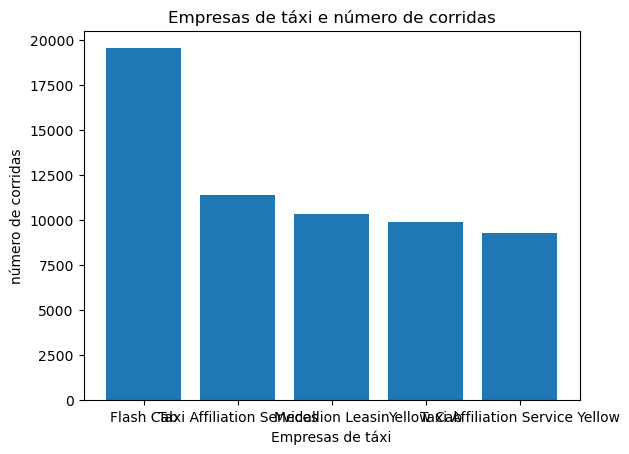

In [25]:
plt.bar(companies['company_name'], companies['trips_amount'])
plt.title('Empresas de táxi e número de corridas')
plt.xlabel('Empresas de táxi')
plt.ylabel('número de corridas')
plt.xticks(rotatiovn=75) 
plt.show()

Quando da filtragem tivemos as seguintes empresas: Flash Cab, Taxi Affiliation Services, Medallion Leasin, Yellow Cab, Taxi Affiliation Service Yellow. Assim, com o gráfico feito com essas empresas notamos que há uma empresa - Flash Cab - que tem destaque na quantidade de corridas realizadas, sendo a que tem um número mais expressivo, enquanto as outras 4 possuem números de corridas semelhantes entre elas. 


Agora iremos criar o gráfico para podermos analisar os 10 bairros que tiveram o maior número de corridas em que seria o bairro de destino. Porém, antes de fazermos o gráfico iremos filtrar o dataframe df2 para termos os top 10 bairros. Filtraremos, os bairros que possuem numero médio de viagens maiores que 1259.

In [26]:
bairros = df2.query('average_trips > 1259')
bairros

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


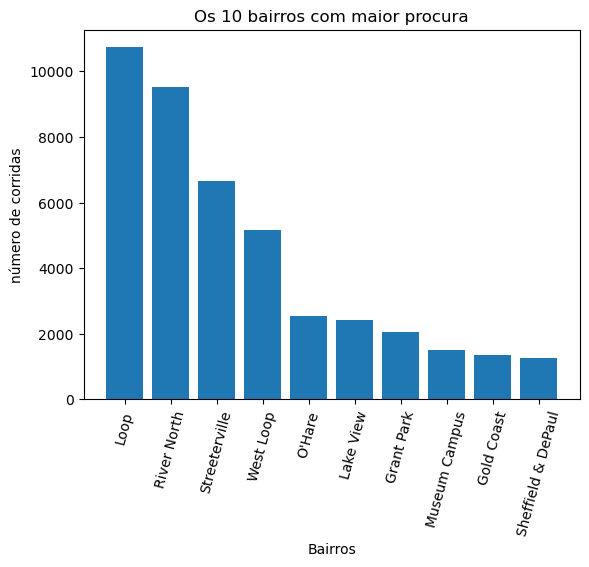

In [27]:
plt.bar(bairros['dropoff_location_name'], bairros['average_trips'])
plt.title('Os 10 bairros com maior procura')
plt.xlabel('Bairros')
plt.ylabel('número de corridas')
plt.xticks(rotation=75) 
plt.show()

Filtramos os 10 bairros que possuem o maior número de corridas onde são o destino final dos usuários e pudemos ver que há 4 bairros com maior procura, são eles Loop, River North, Streeterville e West Loop. No entanto, o bairro Loop é o que apresenta a maior procura, e os outros 3 seguem com certa diferença em ordem decrescente. Já quanto aos outros 6 bairros, apesar de estarem entre os 10, possuem números semelhantes entre eles e grande discrepância em relação aos 4 primeiros.

Assim, com essa análise e gráficos, pudemos concluir que há várias empresas de carona, mas as mais procuradas são Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab e Taxi Affiliation Service Yellow. Também pudemos concluir que, entre os 10 bairros mais procurados como destino final, os 4 mais populares são Loop, River North, Streeterville e West Loop. E ainda, sobre os bairros, podemos concluir que o bairro que mais tem usuários seria o Loop, devido a ser o que possui um número mais expressivo em relação aos demais.

# Testando as hipóteses

Com os dados analisados agora iremos testar hipóteses. Abaixo testaremos a hipótese sobre a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare e os sábados chuvosos. Para esse teste utilizaremos o datafram df3, tendo em vista que esse possui os dados sobre viagens do Loop para o Aeroporto Internacional O'Hare. 

Sobre a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare e os sábados chuvosos formulamos as seguintes hipoteses:

- Hipótese nula: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare nao muda nos sábados chuvosos.
- Hipótese alternativa: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [28]:
alpha = 0.05

sample_1 = df3[df3['weather_conditions'].str.contains('Bad')]
sample_2 = df3[df3['weather_conditions'].str.contains('Good')]
results = st.ttest_ind(sample_1['duration_seconds'], sample_2['duration_seconds'], equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print ("Rejeitamos a hipótese nula")
else:
    print ("Nós não podemos rejeitar a hipótese nula")

p-value:  6.738994326108734e-12
Rejeitamos a hipótese nula


Para testarmos a hipótese definimos que se o resultado do p-value fosse menor que um nível de significância 0,05 (alpha) rejeitariamos a hipótese nula e seguiriamos com a hipóteses alternativa e caso contrário não iriamos rejeitar a hipótese nula.

Portanto, concluimos que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

# CONCLUSÃO

Esse estudo tinha como objetivo identificar as preferências dos passageiros e o impacto de fatores externos nas corridas, analisando os dados de empresas concorrentes para que, assim, a empresa Zuber, que está sendo lançada, pudesse, com auxílio das informações dessa análise abaixo, definir os próximos passos.

Identificamos os 10 principais bairros em termos de destinos finais, os quais eram:

1 - Loop
2 - River North
3 - Streeterville
4 - West Loop
5 - O'Hare
6 - Lake View
7 - Grant Park
8 - Museum Campus
9 - Gold Coast
10 - Sheffield & DePaul

Analisando os gráficos, percebemos que as 5 empresas com mais viagens feitas são: Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab e Taxi Affiliation Service Yellow. Ainda, a empresa Flash Cab era a que tinha um número mais expressivo de corridas realizadas, enquanto as outras 4 possuíam números de corridas semelhantes entre elas, mas não um número próximo da Flash Cab.

Quanto aos 10 bairros que possuem o maior número de corridas onde são o destino final dos usuários, pudemos ver que há 4 bairros com maior procura: Loop, River North, Streeterville e West Loop. No entanto, o bairro Loop foi o que apresentou maior procura, e os outros 3 seguiram com certa diferença entre eles. Já quanto aos outros 6 bairros, apesar de estarem entre os 10, possuem números semelhantes entre eles e grande discrepância em relação aos 4 primeiros.

Assim, concluímos que havia várias empresas de carona, mas as mais procuradas eram Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab e Taxi Affiliation Service Yellow. Também pudemos concluir que, entre os 10 bairros mais procurados como destino final, os 4 mais populares eram Loop, River North, Streeterville e West Loop. E ainda, sobre os bairros, pudemos concluir que o bairro que mais tem usuários seria o Loop, devido a ser o que possuía um número ainda mais expressivo em relação aos demais.

Por fim, quando testamos a hipótese sobre o impacto do clima na frequência das viagens, concluímos que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.